# Sklearn

## sklearn.linear_model

In [1]:
from matplotlib.colors import ListedColormap
from sklearn import model_selection, datasets, linear_model, metrics

import numpy as np

import warnings
warnings.filterwarnings("ignore")

In [2]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


### Линейная регрессия

#### Генерация данных

In [3]:
data, target, coef = datasets.make_regression(n_features = 2, n_informative = 1, n_targets = 1, 
                                              noise = 1., coef = True, random_state = 5)

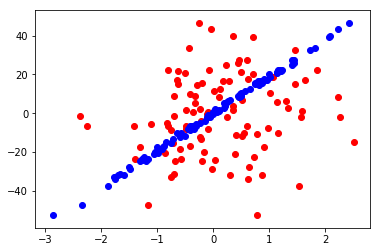

In [4]:
pylab.scatter([x[0] for x in data], target, color = 'r')
pylab.scatter([x[1] for x in data], target, color = 'b')

In [5]:
train_data, test_data, train_labels, test_labels = model_selection.train_test_split(data, target,  
                                                                                     test_size = 0.3)

#### LinearRegression

In [6]:
linear_regressor = linear_model.LinearRegression()
linear_regressor.fit(train_data, train_labels)
predictions = linear_regressor.predict(test_data)

In [7]:
print (test_labels)

[-10.83080621  32.54165655  17.29667263  15.30528454 -31.61344512
 -16.89100107 -15.55044169  -4.82136826  27.40345703  -5.7063822
  -8.21321983  20.1934927   22.550878   -24.57261328 -24.55713366
  21.45310544   8.45696807  -2.19172198  -6.3731343   -6.4246047
  18.45438111  39.95813822  12.66698806  -8.32848971  -6.80848733
  -0.99408003  20.81582179 -47.46125788  43.65530208 -12.07204955]


In [8]:
print (predictions)

[-11.19744037  33.11327502  17.88197969  14.33229635 -31.78712064
 -16.7106533  -14.6620414   -4.83161371  27.4941126   -6.03160091
  -8.64306233  18.90799982  22.40320541 -25.07805464 -22.74731271
  21.57263421   8.7710858   -1.44945634  -7.98961467  -5.99785175
  19.39284836  39.52621169  12.35475308  -6.50144264  -7.50473032
  -1.89828539  21.41835728 -44.58793528  42.19387225 -11.49359712]


In [9]:
metrics.mean_absolute_error(test_labels, predictions)

0.73961238180863

In [10]:
metrics.SCORERS.keys()

dict_keys(['explained_variance', 'r2', 'neg_median_absolute_error', 'neg_mean_absolute_error', 'neg_mean_squared_error', 'neg_mean_squared_log_error', 'accuracy', 'roc_auc', 'balanced_accuracy', 'average_precision', 'neg_log_loss', 'brier_score_loss', 'adjusted_rand_score', 'homogeneity_score', 'completeness_score', 'v_measure_score', 'mutual_info_score', 'adjusted_mutual_info_score', 'normalized_mutual_info_score', 'fowlkes_mallows_score', 'precision', 'precision_macro', 'precision_micro', 'precision_samples', 'precision_weighted', 'recall', 'recall_macro', 'recall_micro', 'recall_samples', 'recall_weighted', 'f1', 'f1_macro', 'f1_micro', 'f1_samples', 'f1_weighted'])

In [11]:
linear_scoring = model_selection.cross_val_score(linear_regressor, 
     data, target, scoring = 'neg_mean_absolute_error', 
                                                  cv = 10)
print ('mean: {}, std: {}'.format(-linear_scoring.mean(), linear_scoring.std()))

mean: 0.8330356985086833, std: 0.2551272220435786


In [12]:
scorer = metrics.make_scorer(metrics.mean_absolute_error, greater_is_better = True)

In [13]:
linear_scoring = model_selection.cross_val_score(linear_regressor, data, target, scoring=scorer, 
                                                  cv = 10)
print ('mean: {}, std: {}'.format(linear_scoring.mean(), linear_scoring.std()))

mean: 0.8330356985086833, std: 0.2551272220435786


In [14]:
coef

array([ 0.        , 19.06563342])

In [15]:
linear_regressor.coef_

array([ 0.19603501, 18.94546225])

In [16]:
# в лекции не указано, что в уравнении обученной модели также участвует свободный член
linear_regressor.intercept_

-0.10967280817210989

In [17]:
print ("y = {:.2f}*x1 + {:.2f}*x2".format(coef[0], coef[1]))

y = 0.00*x1 + 19.07*x2


In [18]:
print ("y = {:.2f}*x1 + {:.2f}*x2 + {:.2f}".format(linear_regressor.coef_[0], 
                                                  linear_regressor.coef_[1], 
                                                  linear_regressor.intercept_))

y = 0.20*x1 + 18.95*x2 + -0.11


#### Lasso

In [19]:
lasso_regressor = linear_model.Lasso(random_state = 3)
lasso_regressor.fit(train_data, train_labels)
lasso_predictions = lasso_regressor.predict(test_data)

In [20]:
lasso_scoring = model_selection.cross_val_score(lasso_regressor, data, target, scoring = scorer, cv = 10)
print ('mean: {}, std: {}'.format(lasso_scoring.mean(), lasso_scoring.std()))

mean: 1.081632497532309, std: 0.3054780049474404


In [21]:
lasso_regressor.coef_

array([ 0.        , 18.00040046])

In [22]:
print ("y = {:.2f}*x1 + {:.2f}*x2 + {:.2f}".format(lasso_regressor.coef_[0], 
                                                  lasso_regressor.coef_[1], 
                                                  lasso_regressor.intercept_))

y = 0.00*x1 + 18.00*x2 + -0.14


#### От записавшегося на курс

In [23]:
print ("LINEAR. y = {:.2f}*x1 + {:.2f}*x2 + {:.2f}".format(linear_regressor.coef_[0], 
                                                  linear_regressor.coef_[1], 
                                                  linear_regressor.intercept_))

LINEAR. y = 0.20*x1 + 18.95*x2 + -0.11


In [24]:
print ("LASSO. y = {:.2f}*x1 + {:.2f}*x2 + {:.2f}".format(lasso_regressor.coef_[0], 
                                                  lasso_regressor.coef_[1], 
                                                  lasso_regressor.intercept_))

LASSO. y = 0.00*x1 + 18.00*x2 + -0.14


L1 - отбор признаков, перед вторым коэффициентом стоит 0